<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Times_series_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#transformers for time series data
# n-beats: neural basis expansion analysis for interpretable time series forecasting
# detrend data
#remove seasonality
#turn into supervised learning process
#get baseline , important for ML problems start with simple
# naive baseline = predict the last time step as the next step
#being able to quantify our confidence in forecasting referred to as uncertainty, confidence interval, prediction interval
#UBER uses Bayesian or MC dropout
# one way to do this is Monte Carlo dropout is to use dropout at inference and run multiple simulations
#two types of uncertainty
#1. coconut uncertainty - get hit on a beach by coconut = epistemic uncertainty./ hard to estimate
#2. subway uncertainty - train should appear at 5pm but it shows up 1-2 min either side. = aleatory uncertainty=
#aleatory uncertainty = data uncertainty
#weather = predict every day 
#nate silver vs Nasim Taleb
# politic outcomes = open system, many different variables
#silver says that last outcome is all that matters
#taleb says 
#WRMSSE = WEIGHT ROOT MEAN SQUARE ERROR
#kaggle 101 = GOT A TABULAR DATA? THEN STACK TOGETHER ENSEMBLES OF LIGHTGBM/XGBOOST




In [2]:
#want to replicate https://arxiv.org/pdf/1905.10437.pdf
#get data
#format data
#build model
#test model
#play around with uncertainty
#the best models were ensembles of statistical techniques

In [3]:
!wget https://github.com/ElementAI/N-BEATS

--2022-04-12 08:35:33--  https://github.com/ElementAI/N-BEATS
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘N-BEATS’

N-BEATS                 [ <=>                ] 175.89K  --.-KB/s    in 0.02s   

2022-04-12 08:35:34 (7.29 MB/s) - ‘N-BEATS’ saved [180116]



In [4]:
!wget https://github.com/ElementAI/N-BEATS/tree/master/datasets

--2022-04-12 08:35:36--  https://github.com/ElementAI/N-BEATS/tree/master/datasets
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘datasets’

datasets                [ <=>                ] 108.14K  --.-KB/s    in 0.02s   

2022-04-12 08:35:37 (4.43 MB/s) - ‘datasets’ saved [110734]



In [5]:
!git clone https://github.com/Mcompetitions/M4-methods

Cloning into 'M4-methods'...
remote: Enumerating objects: 2482, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 2482 (delta 3), reused 0 (delta 0), pack-reused 2473
Receiving objects: 100% (2482/2482), 1.40 GiB | 14.42 MiB/s, done.
Resolving deltas: 100% (707/707), done.
Checking out files: 100% (320/320), done.


In [6]:
! ls M4-methods/Dataset/Train/

Daily-train.csv   Monthly-train.csv    Weekly-train.csv
Hourly-train.csv  Quarterly-train.csv  Yearly-train.csv


In [7]:
import pandas as pd
daily = pd.read_csv("M4-methods/Dataset/Train/Daily-train.csv")
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Columns: 9920 entries, V1 to V9920
dtypes: float64(9919), object(1)
memory usage: 319.9+ MB


In [8]:
daily.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9911,V9912,V9913,V9914,V9915,V9916,V9917,V9918,V9919,V9920
0,D1,1017.10,1019.30,1017.00,1019.20,1018.70,1015.60,1018.50,1018.30,1018.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D2,2793.70,2793.80,2803.70,2805.80,2802.30,2795.00,2806.40,2782.20,2780.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D3,1091.30,1088.50,1085.70,1082.90,1080.10,1077.30,1074.50,1071.70,1068.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D4,1092.00,1078.00,1064.00,1050.00,1036.00,1022.00,1008.00,1092.00,1078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D5,2938.63,2956.44,2964.41,2972.41,3014.97,3014.23,3024.08,3031.97,3062.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Transpose
d1 = daily.loc[0].transpose()
d1.head()

V1        D1
V2    1017.1
V3    1019.3
V4    1017.0
V5    1019.2
Name: 0, dtype: object

In [10]:
d1_new=pd.DataFrame(d1).reset_index().drop([0])
d1_new = d1_new.drop("index", axis=1)
d1_new.columns = ["values"]
d1_new

,values
1,1017.1
2,1019.3
3,1017.0
4,1019.2
5,1018.7
...,...
9915,NaN
9916,NaN
9917,NaN
9918,NaN


In [11]:
d1_new.head()

,values
1,1017.1
2,1019.3
3,1017.0
4,1019.2
5,1018.7


In [12]:
d1_new.isna().value_counts()

values
True      8913
False     1006
dtype: int64

In [13]:
d1_new = pd.DataFrame(d1).reset_index().drop([0])
d1_new

,index,0
1,V2,1017.1
2,V3,1019.3
3,V4,1017.0
4,V5,1019.2
5,V6,1018.7
...,...,...
9915,V9916,NaN
9916,V9917,NaN
9917,V9918,NaN
9918,V9919,NaN


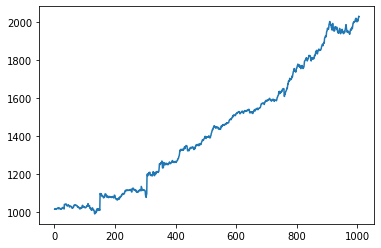

In [14]:
d1_new[0].plot()

In [15]:
d1_new.head()

,index,0
1,V2,1017.1
2,V3,1019.3
3,V4,1017.0
4,V5,1019.2
5,V6,1018.7


In [16]:
import pandas as pd
weekly = pd.read_csv("M4-methods/Dataset/Train/Weekly-train.csv")
weekly.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2589,V2590,V2591,V2592,V2593,V2594,V2595,V2596,V2597,V2598
0,W1,1089.200,1078.910,1079.88,1063.580,1060.61,1056.930,1056.630,1049.510,1049.320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W2,195.928,194.796,192.71,190.288,188.77,187.043,187.353,186.808,186.721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W3,258.700,259.800,260.20,260.800,261.10,263.100,264.500,266.300,267.200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W4,3460.000,3340.000,2770.00,2520.000,2740.00,2760.000,2470.000,2480.000,3260.000,...,2315.35,2195.23,2170.14,2156.88,2177.15,1932.91,2056.49,1984.55,2004.56,2385.81
4,W5,4696.000,4765.000,4144.00,3945.000,4733.00,4330.000,5046.000,3898.000,4568.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
import pandas as pd
info = pd.read_csv("M4-methods/Dataset/M4-info.csv")
info

,M4id,category,Frequency,Horizon,SP,StartingDate
0,Y1,Macro,1,6,Yearly,01-01-79 12:00
1,Y2,Macro,1,6,Yearly,01-01-79 12:00
2,Y3,Macro,1,6,Yearly,01-01-79 12:00
3,Y4,Macro,1,6,Yearly,01-01-79 12:00
4,Y5,Macro,1,6,Yearly,01-01-79 12:00
...,...,...,...,...,...,...
99995,H410,Other,24,48,Hourly,01-01-17 12:00
99996,H411,Other,24,48,Hourly,01-01-17 12:00
99997,H412,Other,24,48,Hourly,01-01-17 12:00
99998,H413,Other,24,48,Hourly,12-06-17 12:00


In [18]:
info

,M4id,category,Frequency,Horizon,SP,StartingDate
0,Y1,Macro,1,6,Yearly,01-01-79 12:00
1,Y2,Macro,1,6,Yearly,01-01-79 12:00
2,Y3,Macro,1,6,Yearly,01-01-79 12:00
3,Y4,Macro,1,6,Yearly,01-01-79 12:00
4,Y5,Macro,1,6,Yearly,01-01-79 12:00
...,...,...,...,...,...,...
99995,H410,Other,24,48,Hourly,01-01-17 12:00
99996,H411,Other,24,48,Hourly,01-01-17 12:00
99997,H412,Other,24,48,Hourly,01-01-17 12:00
99998,H413,Other,24,48,Hourly,12-06-17 12:00


In [19]:
info[info["M4id"].str.contains("D")]

,M4id,category,Frequency,Horizon,SP,StartingDate
95359,D1,Macro,1,14,Daily,03-01-94 12:00
95360,D2,Macro,1,14,Daily,02-01-95 12:00
95361,D3,Macro,1,14,Daily,05-01-06 12:00
95362,D4,Macro,1,14,Daily,30-05-96 12:00
95363,D5,Macro,1,14,Daily,03-01-97 12:00
...,...,...,...,...,...,...
99581,D4223,Other,1,14,Daily,28-07-16 12:00
99582,D4224,Other,1,14,Daily,28-07-16 12:00
99583,D4225,Other,1,14,Daily,14-09-16 12:00
99584,D4226,Other,1,14,Daily,03-01-00 12:00


In [20]:
#to format time series data, turn it into supervised learning problem
# build model to use steps from past to predict future
# one common method for doing this is windowing() method. 
#predict 14 days into the future
#currently have daily data set
# frequency map = 1
#example of windowing for a weeek
#(0,1,3,4,5,6,7) -> (7)
#(1,2,3,4,5,6,7) -> (8)
#(2,3,4,5,6,7,8) -> (9)

In [21]:
# make train, test for time series

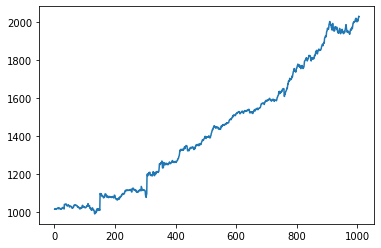

In [99]:
d1_new[0].plot()

In [100]:
#turn data into arrays
values = d1_new[0].to_numpy()
values

array([1017.1, 1019.3, 1017.0, ..., 2022.1, 2031.6, 2029.7], dtype=object)

In [101]:
values.shape

(1006,)

In [102]:
import numpy as np

d1_new.dropna(inplace=True)
timesteps = np.array(d1_new.index)
values, timesteps

(array([1017.1, 1019.3, 1017.0, ..., 2022.1, 2031.6, 2029.7], dtype=object),
 array([   1,    2,    3, ..., 1004, 1005, 1006]))

In [103]:
values.shape

(1006,)

In [104]:
timesteps.shape

(1006,)

In [105]:
# lets make train test split
#1:47:25

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(timesteps, values, test_size = 0.2, random_state=42)

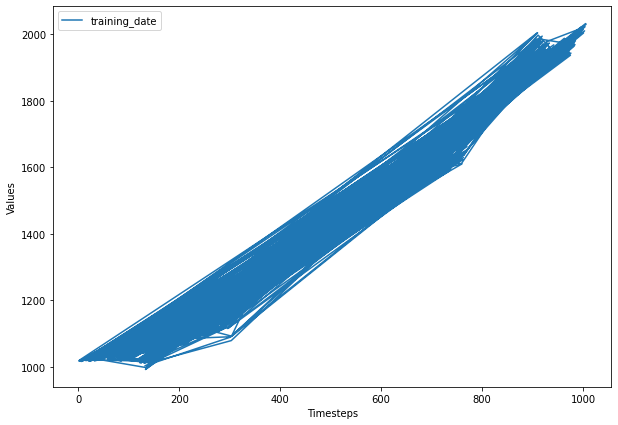

In [106]:
#plot splits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(X_train, y_train, label = "training_date")
plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("Values")
plt.show();

In [107]:
# how do we fix our training/test split for time series
#goal is to use past data to predict future
# e.g. use first 800 steps to predict next 200

In [108]:
#lets use indexing
split = int(len(values) * 0.8)
split
X_train, X_test = timesteps[:split], timesteps[split:]
y_train, y_test = values[:split], values[split:]

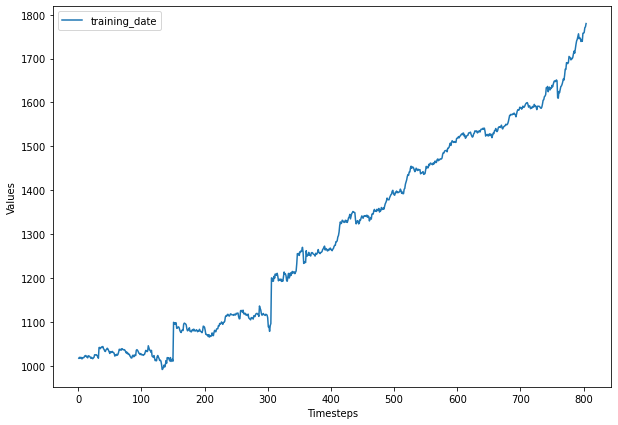

In [109]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(X_train, y_train, label = "training_date")
plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("Values")
plt.show();

In [39]:
#more data formatting options
# seasonality and trend removal

In [40]:
#turn data into windows

In [41]:
# for turning our data into windows, we can use TensorFlow tf.data.Dataset package
# https://stackoverflow.com/questions/55429307/how-to-use-windows-created-by-the-dataset-window-method-in-tensorflow-2-0

In [42]:
import tensorflow as tf

dataset = tf.data.Dataset.range(7).window(2)
for window in dataset:
  print(list(window.as_numpy_iterator()))

[0, 1]
[2, 3]
[4, 5]
[6]


In [43]:
for i in tf.data.Dataset.range(7).as_numpy_iterator():
  print(i)

0
1
2
3
4
5
6


In [44]:
#building window function from scratch 
# make hacky version first
#step through values
#store X values in a window (X = window size)
# store X + y values in labels (y = number of steps to look ahead)
# finish with X & y pairs where X is a window of certain number of steps, y is a few steps ahead of X
data = []
labels = []
window_size=10
current_window = []
current_labels = []
for i, value in enumerate (values):
  current_window.append(value)
  
  if i % window_size == 0:
     data.append(current_window)

data



[[1017.1,
  1019.3,
  1017.0,
  1019.2,
  1018.7,
  1015.6,
  1018.5,
  1018.3,
  1018.4,
  1021.5,
  1023.0,
  1023.3,
  1020.5,
  1021.4,
  1018.1,
  1022.6,
  1022.6,
  1021.0,
  1020.1,
  1017.0,
  1019.3,
  1017.3,
  1016.1,
  1017.8,
  1019.3,
  1025.1,
  1024.8,
  1025.1,
  1025.1,
  1022.6,
  1021.2,
  1017.2,
  1041.5,
  1041.7,
  1038.9,
  1041.0,
  1042.9,
  1042.1,
  1043.9,
  1039.0,
  1037.3,
  1033.7,
  1032.5,
  1036.3,
  1037.5,
  1040.0,
  1038.4,
  1035.3,
  1032.0,
  1028.1,
  1032.2,
  1030.2,
  1031.2,
  1032.8,
  1030.3,
  1030.2,
  1028.1,
  1022.1,
  1024.4,
  1023.4,
  1026.3,
  1024.0,
  1026.1,
  1031.0,
  1037.6,
  1036.6,
  1037.4,
  1035.4,
  1038.9,
  1038.7,
  1036.5,
  1036.4,
  1036.8,
  1035.3,
  1032.6,
  1029.3,
  1031.3,
  1027.4,
  1028.6,
  1025.8,
  1026.0,
  1022.3,
  1020.1,
  1017.7,
  1018.0,
  1023.2,
  1024.2,
  1020.5,
  1022.2,
  1025.3,
  1023.3,
  1035.3,
  1036.7,
  1035.1,
  1032.5,
  1028.7,
  1028.1,
  1025.6,
  1027.9,
  1025.0,


In [45]:
y_values = values[0:-1:10]

In [46]:
# build a sliding window function from scratch..
# there are already implemented of this in tensorflow
#make hacky version first
# reshape input

X_train = np.reshape(X_train, (-1, 1))
X_train

#roll it
temp_train = np.roll(X_train, -1)
temp_train


array([[  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
      

In [47]:
y_train

array([1017.1, 1019.3, 1017.0, 1019.2, 1018.7, 1015.6, 1018.5, 1018.3,
       1018.4, 1021.5, 1023.0, 1023.3, 1020.5, 1021.4, 1018.1, 1022.6,
       1022.6, 1021.0, 1020.1, 1017.0, 1019.3, 1017.3, 1016.1, 1017.8,
       1019.3, 1025.1, 1024.8, 1025.1, 1025.1, 1022.6, 1021.2, 1017.2,
       1041.5, 1041.7, 1038.9, 1041.0, 1042.9, 1042.1, 1043.9, 1039.0,
       1037.3, 1033.7, 1032.5, 1036.3, 1037.5, 1040.0, 1038.4, 1035.3,
       1032.0, 1028.1, 1032.2, 1030.2, 1031.2, 1032.8, 1030.3, 1030.2,
       1028.1, 1022.1, 1024.4, 1023.4, 1026.3, 1024.0, 1026.1, 1031.0,
       1037.6, 1036.6, 1037.4, 1035.4, 1038.9, 1038.7, 1036.5, 1036.4,
       1036.8, 1035.3, 1032.6, 1029.3, 1031.3, 1027.4, 1028.6, 1025.8,
       1026.0, 1022.3, 1020.1, 1017.7, 1018.0, 1023.2, 1024.2, 1020.5,
       1022.2, 1025.3, 1023.3, 1035.3, 1036.7, 1035.1, 1032.5, 1028.7,
       1028.1, 1025.6, 1027.9, 1025.0, 1025.7, 1025.0, 1023.7, 1025.5,
       1025.8, 1030.5, 1035.1, 1034.2, 1032.2, 1033.6, 1045.6, 1040.3,
      

In [48]:
y_train = np.roll(y_train, -5)[:-5]
y_train

array([1015.6, 1018.5, 1018.3, 1018.4, 1021.5, 1023.0, 1023.3, 1020.5,
       1021.4, 1018.1, 1022.6, 1022.6, 1021.0, 1020.1, 1017.0, 1019.3,
       1017.3, 1016.1, 1017.8, 1019.3, 1025.1, 1024.8, 1025.1, 1025.1,
       1022.6, 1021.2, 1017.2, 1041.5, 1041.7, 1038.9, 1041.0, 1042.9,
       1042.1, 1043.9, 1039.0, 1037.3, 1033.7, 1032.5, 1036.3, 1037.5,
       1040.0, 1038.4, 1035.3, 1032.0, 1028.1, 1032.2, 1030.2, 1031.2,
       1032.8, 1030.3, 1030.2, 1028.1, 1022.1, 1024.4, 1023.4, 1026.3,
       1024.0, 1026.1, 1031.0, 1037.6, 1036.6, 1037.4, 1035.4, 1038.9,
       1038.7, 1036.5, 1036.4, 1036.8, 1035.3, 1032.6, 1029.3, 1031.3,
       1027.4, 1028.6, 1025.8, 1026.0, 1022.3, 1020.1, 1017.7, 1018.0,
       1023.2, 1024.2, 1020.5, 1022.2, 1025.3, 1023.3, 1035.3, 1036.7,
       1035.1, 1032.5, 1028.7, 1028.1, 1025.6, 1027.9, 1025.0, 1025.7,
       1025.0, 1023.7, 1025.5, 1025.8, 1030.5, 1035.1, 1034.2, 1032.2,
       1033.6, 1045.6, 1040.3, 1035.9, 1035.4, 1031.0, 1035.1, 1022.1,
      

In [49]:
for i in tf.data.Dataset.range(7).as_numpy_iterator():
  print(i)

0
1
2
3
4
5
6


In [50]:
#create a tensorflow windowed dataset
window_size = 10

def create_window_dataset(data, window_size=10):
  dataset = tf.data.Dataset.from_tensor_slices(tf.constant(data, dtype=tf.float32))
  dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
  dataset = dataset.map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)

  return dataset
                        


In [51]:
dataset = tf.data.Dataset.from_tensor_slices(tf.constant(y_train, dtype=tf.float32))
for element in dataset.as_numpy_iterator():
  print(element)
  print(i)
  if i % 10 == 0:
    break

1015.6
6
1018.5
6
1018.3
6
1018.4
6
1021.5
6
1023.0
6
1023.3
6
1020.5
6
1021.4
6
1018.1
6
1022.6
6
1022.6
6
1021.0
6
1020.1
6
1017.0
6
1019.3
6
1017.3
6
1016.1
6
1017.8
6
1019.3
6
1025.1
6
1024.8
6
1025.1
6
1025.1
6
1022.6
6
1021.2
6
1017.2
6
1041.5
6
1041.7
6
1038.9
6
1041.0
6
1042.9
6
1042.1
6
1043.9
6
1039.0
6
1037.3
6
1033.7
6
1032.5
6
1036.3
6
1037.5
6
1040.0
6
1038.4
6
1035.3
6
1032.0
6
1028.1
6
1032.2
6
1030.2
6
1031.2
6
1032.8
6
1030.3
6
1030.2
6
1028.1
6
1022.1
6
1024.4
6
1023.4
6
1026.3
6
1024.0
6
1026.1
6
1031.0
6
1037.6
6
1036.6
6
1037.4
6
1035.4
6
1038.9
6
1038.7
6
1036.5
6
1036.4
6
1036.8
6
1035.3
6
1032.6
6
1029.3
6
1031.3
6
1027.4
6
1028.6
6
1025.8
6
1026.0
6
1022.3
6
1020.1
6
1017.7
6
1018.0
6
1023.2
6
1024.2
6
1020.5
6
1022.2
6
1025.3
6
1023.3
6
1035.3
6
1036.7
6
1035.1
6
1032.5
6
1028.7
6
1028.1
6
1025.6
6
1027.9
6
1025.0
6
1025.7
6
1025.0
6
1023.7
6
1025.5
6
1025.8
6
1030.5
6
1035.1
6
1034.2
6
1032.2
6
1033.6
6
1045.6
6
1040.3
6
1035.9
6
1035.4
6
1031.0
6
1035.1
6
1

In [52]:
#turn array into tensors
dataset = tf.data.Dataset.from_tensor_slices(tf.constant(y_train, dtype=tf.float32))
for element in list(dataset.as_numpy_iterator())[:10]:
  print(element)

1015.6
1018.5
1018.3
1018.4
1021.5
1023.0
1023.3
1020.5
1021.4
1018.1


In [53]:
#turn into windows
dataset = dataset.window(size=10, shift=1, drop_remainder=True)
for window in dataset.take(10):
  print(list(window.as_numpy_iterator()))

[1015.6, 1018.5, 1018.3, 1018.4, 1021.5, 1023.0, 1023.3, 1020.5, 1021.4, 1018.1]
[1018.5, 1018.3, 1018.4, 1021.5, 1023.0, 1023.3, 1020.5, 1021.4, 1018.1, 1022.6]
[1018.3, 1018.4, 1021.5, 1023.0, 1023.3, 1020.5, 1021.4, 1018.1, 1022.6, 1022.6]
[1018.4, 1021.5, 1023.0, 1023.3, 1020.5, 1021.4, 1018.1, 1022.6, 1022.6, 1021.0]
[1021.5, 1023.0, 1023.3, 1020.5, 1021.4, 1018.1, 1022.6, 1022.6, 1021.0, 1020.1]
[1023.0, 1023.3, 1020.5, 1021.4, 1018.1, 1022.6, 1022.6, 1021.0, 1020.1, 1017.0]
[1023.3, 1020.5, 1021.4, 1018.1, 1022.6, 1022.6, 1021.0, 1020.1, 1017.0, 1019.3]
[1020.5, 1021.4, 1018.1, 1022.6, 1022.6, 1021.0, 1020.1, 1017.0, 1019.3, 1017.3]
[1021.4, 1018.1, 1022.6, 1022.6, 1021.0, 1020.1, 1017.0, 1019.3, 1017.3, 1016.1]
[1018.1, 1022.6, 1022.6, 1021.0, 1020.1, 1017.0, 1019.3, 1017.3, 1016.1, 1017.8]


In [54]:
#flat map
dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
for window in dataset.take(10):
  print(list(window.as_numpy_iterator()))

AttributeError: ignored

In [55]:
train_dataset = create_window_dataset(y_train, window_size=10)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [56]:
y_test[:-10]

array([1776.3, 1773.0, 1770.3, 1774.3, 1765.2, 1774.5, 1763.1, 1765.3,
       1760.3, 1756.0, 1767.8, 1769.5, 1765.8, 1772.6, 1767.7, 1762.4,
       1756.4, 1759.6, 1762.0, 1764.6, 1779.5, 1795.3, 1797.4, 1798.4,
       1802.6, 1805.1, 1811.5, 1807.7, 1812.1, 1804.4, 1796.5, 1800.5,
       1805.5, 1810.5, 1809.3, 1822.8, 1825.6, 1821.7, 1822.5, 1824.9,
       1822.6, 1815.4, 1809.5, 1796.3, 1805.9, 1812.4, 1805.6, 1810.7,
       1808.4, 1805.6, 1813.9, 1811.7, 1808.3, 1817.3, 1825.9, 1825.6,
       1823.8, 1836.2, 1844.2, 1847.0, 1843.5, 1852.3, 1842.8, 1833.3,
       1836.0, 1847.0, 1851.3, 1855.6, 1858.5, 1850.5, 1856.3, 1854.4,
       1856.0, 1853.7, 1852.3, 1857.8, 1859.7, 1869.7, 1875.2, 1877.9,
       1884.0, 1880.5, 1876.6, 1886.7, 1891.1, 1893.8, 1890.1, 1912.0,
       1919.7, 1920.9, 1927.1, 1925.5, 1923.2, 1933.8, 1950.7, 1952.7,
       1960.4, 1969.1, 1961.7, 1963.2, 1963.1, 1971.3, 1989.9, 1992.2,
       2003.6, 2003.6, 1996.8, 1985.7, 1988.3, 1982.0, 1971.6, 1980.5,
      

In [57]:
for data, label in train_dataset.take(1):
  print(data, label)

tf.Tensor(
[[1015.6 1018.5 1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1]
 [1018.5 1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6]
 [1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6]
 [1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021. ]
 [1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1]
 [1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1 1017. ]
 [1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1 1017.  1019.3]
 [1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1 1017.  1019.3 1017.3]
 [1021.4 1018.1 1022.6 1022.6 1021.  1020.1 1017.  1019.3 1017.3 1016.1]
 [1018.1 1022.6 1022.6 1021.  1020.1 1017.  1019.3 1017.3 1016.1 1017.8]
 [1022.6 1022.6 1021.  1020.1 1017.  1019.3 1017.3 1016.1 1017.8 1019.3]
 [1022.6 1021.  1020.1 1017.  1019.3 1017.3 1016.1 1017.8 1019.3 1025.1]
 [1021.  1020.1 1017.  1019.3 1017.3 1016.1 1017.8 1019.3 1025.1 1024.8]
 [1020.1 1017.  1019.3 1017.3 1016.1 101

In [58]:
test_dataset = create_window_dataset(y_test)
test_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [59]:
for element in dataset.take(10):
  print(element)

tf.Tensor([1015.6 1018.5 1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1], shape=(10,), dtype=float32)
tf.Tensor([1018.5 1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6], shape=(10,), dtype=float32)
tf.Tensor([1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6], shape=(10,), dtype=float32)
tf.Tensor([1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021. ], shape=(10,), dtype=float32)
tf.Tensor([1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1], shape=(10,), dtype=float32)
tf.Tensor([1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1 1017. ], shape=(10,), dtype=float32)
tf.Tensor([1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1 1017.  1019.3], shape=(10,), dtype=float32)
tf.Tensor([1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1 1017.  1019.3 1017.3], shape=(10,), dtype=float32)
tf.Tensor([1021.4 1018.1 1022.6 1022.6 1021.  1020.1 1017.  1019.3 1017.3 1016.1], shape=(10,), dtype=float32)
t

In [60]:
dataset = dataset.map(lambda window: (window[:-1], window[-1]))


In [61]:
for data, label in dataset.take(10):
  print(data, label)

tf.Tensor([1015.6 1018.5 1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4], shape=(9,), dtype=float32) tf.Tensor(1018.1, shape=(), dtype=float32)
tf.Tensor([1018.5 1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1], shape=(9,), dtype=float32) tf.Tensor(1022.6, shape=(), dtype=float32)
tf.Tensor([1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6], shape=(9,), dtype=float32) tf.Tensor(1022.6, shape=(), dtype=float32)
tf.Tensor([1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6], shape=(9,), dtype=float32) tf.Tensor(1021.0, shape=(), dtype=float32)
tf.Tensor([1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021. ], shape=(9,), dtype=float32) tf.Tensor(1020.1, shape=(), dtype=float32)
tf.Tensor([1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1], shape=(9,), dtype=float32) tf.Tensor(1017.0, shape=(), dtype=float32)
tf.Tensor([1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1 1017. ], shape=(9,), dtype=float32) tf.Tensor(1019.3, sha

In [62]:
len(y_train)/32

24.96875

In [63]:
import tensorflow as tf
from tensorflow.keras import layers
inputs = layers.Input(shape=(window_size))
#x = layers.Conv1D(64, kernel_size=4, activation="relu")(tf.expand_dims(inputs, axis=1))
#x =layers.LSTM(64, return_sequences=True)(inputs)
#x = layers.LSTM(64)(x)
#x = layers.GlobalMaxPool1D()(x)
#x = layers.Flatten()(inputs)
x = layers.Dense(128,activation="relu")(inputs)
x = layers.Dense(128,activation="relu")(x)
outputs = layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

In [64]:
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["mae"])

In [65]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 5ms/step - loss: 345.8801 - mae: 345.8801
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 95.2958 - mae: 95.2958
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 141.9649 - mae: 141.9649
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 85.3760 - mae: 85.3760
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 54.0869 - mae: 54.0869
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 43.5096 - mae: 43.5096
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 47.7421 - mae: 47.7421
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 53.0373 - mae: 53.0373
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: 100.4970 - mae: 100.4970
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 94.3179 - mae: 94.3179


In [66]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________


In [67]:
tf.expand_dims(tf.expand_dims(tf.constant(y_test, dtype=tf.float32), axis=1), axis=1)

<tf.Tensor: shape=(202, 1, 1), dtype=float32, numpy=
array([[[1776.3]],

       [[1773. ]],

       [[1770.3]],

       [[1774.3]],

       [[1765.2]],

       [[1774.5]],

       [[1763.1]],

       [[1765.3]],

       [[1760.3]],

       [[1756. ]],

       [[1767.8]],

       [[1769.5]],

       [[1765.8]],

       [[1772.6]],

       [[1767.7]],

       [[1762.4]],

       [[1756.4]],

       [[1759.6]],

       [[1762. ]],

       [[1764.6]],

       [[1779.5]],

       [[1795.3]],

       [[1797.4]],

       [[1798.4]],

       [[1802.6]],

       [[1805.1]],

       [[1811.5]],

       [[1807.7]],

       [[1812.1]],

       [[1804.4]],

       [[1796.5]],

       [[1800.5]],

       [[1805.5]],

       [[1810.5]],

       [[1809.3]],

       [[1822.8]],

       [[1825.6]],

       [[1821.7]],

       [[1822.5]],

       [[1824.9]],

       [[1822.6]],

       [[1815.4]],

       [[1809.5]],

       [[1796.3]],

       [[1805.9]],

       [[1812.4]],

       [[1805.6]],

       

In [68]:
y_train[:10], y_train[10+1]

(array([1015.6, 1018.5, 1018.3, 1018.4, 1021.5, 1023.0, 1023.3, 1020.5,
        1021.4, 1018.1], dtype=object), 1022.6)

In [69]:
for data, label in test_dataset.take(1):
  print(data, label)

tf.Tensor(
[[1776.3 1773.  1770.3 1774.3 1765.2 1774.5 1763.1 1765.3 1760.3 1756. ]
 [1773.  1770.3 1774.3 1765.2 1774.5 1763.1 1765.3 1760.3 1756.  1767.8]
 [1770.3 1774.3 1765.2 1774.5 1763.1 1765.3 1760.3 1756.  1767.8 1769.5]
 [1774.3 1765.2 1774.5 1763.1 1765.3 1760.3 1756.  1767.8 1769.5 1765.8]
 [1765.2 1774.5 1763.1 1765.3 1760.3 1756.  1767.8 1769.5 1765.8 1772.6]
 [1774.5 1763.1 1765.3 1760.3 1756.  1767.8 1769.5 1765.8 1772.6 1767.7]
 [1763.1 1765.3 1760.3 1756.  1767.8 1769.5 1765.8 1772.6 1767.7 1762.4]
 [1765.3 1760.3 1756.  1767.8 1769.5 1765.8 1772.6 1767.7 1762.4 1756.4]
 [1760.3 1756.  1767.8 1769.5 1765.8 1772.6 1767.7 1762.4 1756.4 1759.6]
 [1756.  1767.8 1769.5 1765.8 1772.6 1767.7 1762.4 1756.4 1759.6 1762. ]
 [1767.8 1769.5 1765.8 1772.6 1767.7 1762.4 1756.4 1759.6 1762.  1764.6]
 [1769.5 1765.8 1772.6 1767.7 1762.4 1756.4 1759.6 1762.  1764.6 1779.5]
 [1765.8 1772.6 1767.7 1762.4 1756.4 1759.6 1762.  1764.6 1779.5 1795.3]
 [1772.6 1767.7 1762.4 1756.4 1759.6 176

In [70]:
y_test[:10], y_test[:10+1]

(array([1776.3, 1773.0, 1770.3, 1774.3, 1765.2, 1774.5, 1763.1, 1765.3,
        1760.3, 1756.0], dtype=object),
 array([1776.3, 1773.0, 1770.3, 1774.3, 1765.2, 1774.5, 1763.1, 1765.3,
        1760.3, 1756.0, 1767.8], dtype=object))

In [71]:
preds=model.predict(train_dataset)

In [72]:
preds.shape

(789, 1)

In [73]:
train_dataset.element_spec

(TensorSpec(shape=(None, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.float32, name=None))

In [74]:
len([i for i in train_dataset])

25

In [75]:
#make predictions
len(y_test)

202

In [76]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.evaluate(test_dataset)


6/6 [==============================] - 0s 7ms/step - loss: 126.7365 - mae: 126.7365


[126.7364730834961, 126.7364730834961]

In [78]:
model.predict(test_dataset)
preds.shape

(789, 1)

In [79]:
len(y_test)

202

In [80]:
preds[:10]

array([[1091.859 ],
       [1092.2743],
       [1092.8485],
       [1093.5646],
       [1093.5022],
       [1092.8483],
       [1092.5013],
       [1091.6439],
       [1091.3506],
       [1090.963 ]], dtype=float32)

In [81]:
model.predict(test_dataset)

array([[1891.818 ],
       [1890.8973],
       [1890.6223],
       [1891.4441],
       [1890.0989],
       [1890.7374],
       [1890.0122],
       [1887.3551],
       [1887.0627],
       [1888.2646],
       [1888.7518],
       [1890.2026],
       [1894.0372],
       [1898.3351],
       [1900.177 ],
       [1903.2437],
       [1908.369 ],
       [1913.4974],
       [1918.4445],
       [1924.424 ],
       [1928.6918],
       [1929.9858],
       [1929.566 ],
       [1930.7653],
       [1933.1692],
       [1933.5586],
       [1935.5292],
       [1937.9827],
       [1939.1718],
       [1939.1038],
       [1941.5045],
       [1945.0751],
       [1945.6038],
       [1945.7249],
       [1944.8259],
       [1943.3956],
       [1942.4531],
       [1941.9683],
       [1940.0854],
       [1938.5355],
       [1937.4724],
       [1934.6744],
       [1934.7146],
       [1936.0753],
       [1936.7672],
       [1939.5653],
       [1942.1964],
       [1942.8512],
       [1945.4617],
       [1950.4899],


In [82]:
for data, label in test_dataset.take(20):
  print(data, label)

tf.Tensor(
[[1776.3 1773.  1770.3 1774.3 1765.2 1774.5 1763.1 1765.3 1760.3 1756. ]
 [1773.  1770.3 1774.3 1765.2 1774.5 1763.1 1765.3 1760.3 1756.  1767.8]
 [1770.3 1774.3 1765.2 1774.5 1763.1 1765.3 1760.3 1756.  1767.8 1769.5]
 [1774.3 1765.2 1774.5 1763.1 1765.3 1760.3 1756.  1767.8 1769.5 1765.8]
 [1765.2 1774.5 1763.1 1765.3 1760.3 1756.  1767.8 1769.5 1765.8 1772.6]
 [1774.5 1763.1 1765.3 1760.3 1756.  1767.8 1769.5 1765.8 1772.6 1767.7]
 [1763.1 1765.3 1760.3 1756.  1767.8 1769.5 1765.8 1772.6 1767.7 1762.4]
 [1765.3 1760.3 1756.  1767.8 1769.5 1765.8 1772.6 1767.7 1762.4 1756.4]
 [1760.3 1756.  1767.8 1769.5 1765.8 1772.6 1767.7 1762.4 1756.4 1759.6]
 [1756.  1767.8 1769.5 1765.8 1772.6 1767.7 1762.4 1756.4 1759.6 1762. ]
 [1767.8 1769.5 1765.8 1772.6 1767.7 1762.4 1756.4 1759.6 1762.  1764.6]
 [1769.5 1765.8 1772.6 1767.7 1762.4 1756.4 1759.6 1762.  1764.6 1779.5]
 [1765.8 1772.6 1767.7 1762.4 1756.4 1759.6 1762.  1764.6 1779.5 1795.3]
 [1772.6 1767.7 1762.4 1756.4 1759.6 176

In [83]:
X_test.shape, y_test.shape

((202,), (202,))

In [84]:
preds.shape

(789, 1)

In [88]:
len(preds), len(X_test)

(789, 202)

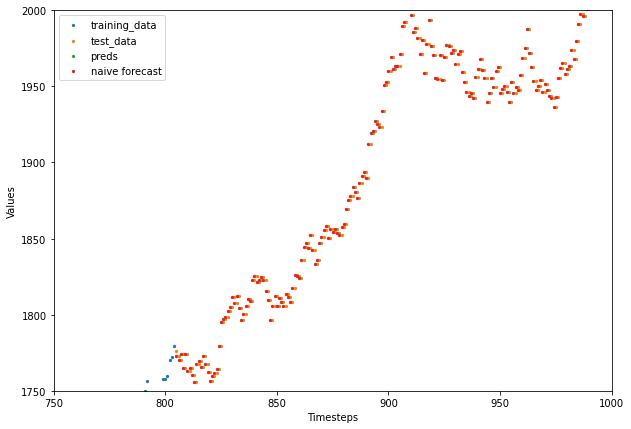

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="training_data")
plt.scatter(X_test, y_test, s=5, label="test_data")
plt.scatter(X_test, preds[:-587], s=5, label="preds")
plt.scatter(X_test[:-1], y_test[1:], s=5, label="naive forecast")
plt.xlim(750, 1000)
plt.ylim(1750, 2000)
plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("Values")
plt.show();

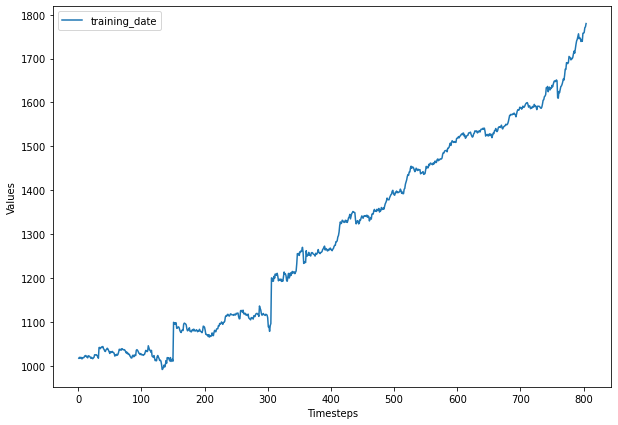

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(X_train, y_train, label = "training_date")
plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("Values")
plt.show();

In [120]:
#create expanded 3D input shape for Conv1D/LSTM models

#create a tensorflow windowed dataset
window_size = 10

def create_window_dataset(data, window_size=10):
  #expand dimensions of input data
  dataset = tf.expand_dims(tf.constant(data, dtype=tf.float32), axis=1)
  dataset = tf.data.Dataset.from_tensor_slices(tf.constant(data, dtype=tf.float32))
  dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
  dataset = dataset.map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)

  return dataset

In [121]:
train_dataset = create_window_dataset(y_train, window_size=10)
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [124]:
for data, label in train_dataset.take(1):
  print(data, label, data.shape, label.shape)

tf.Tensor(
[[1017.1 1019.3 1017.  1019.2 1018.7 1015.6 1018.5 1018.3 1018.4 1021.5]
 [1019.3 1017.  1019.2 1018.7 1015.6 1018.5 1018.3 1018.4 1021.5 1023. ]
 [1017.  1019.2 1018.7 1015.6 1018.5 1018.3 1018.4 1021.5 1023.  1023.3]
 [1019.2 1018.7 1015.6 1018.5 1018.3 1018.4 1021.5 1023.  1023.3 1020.5]
 [1018.7 1015.6 1018.5 1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4]
 [1015.6 1018.5 1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1]
 [1018.5 1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6]
 [1018.3 1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6]
 [1018.4 1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021. ]
 [1021.5 1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1]
 [1023.  1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1 1017. ]
 [1023.3 1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1 1017.  1019.3]
 [1020.5 1021.4 1018.1 1022.6 1022.6 1021.  1020.1 1017.  1019.3 1017.3]
 [1021.4 1018.1 1022.6 1022.6 1021.  102

In [113]:
#if we want to use Conv1D model, have to make sure input shape is correct. 
#create conv1D model for time series
model_2 = tf.keras.Sequential([
                               layers.Conv1D(64, kernel_size = 5, activation="relu", input_shape=[None, 1]),
                               layers.GlobalMaxPool1D(),
                               layers.Dense(1)                                                                  
                                                                                                 
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, None, 64)          384       
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [126]:
model_2.compile(loss="mae", optimizer="adam")

model_2.fit(train_dataset, epochs=10)
                

Epoch 1/10
25/25 [==============================] - 1s 7ms/step - loss: 1106.7297
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 202.1865
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 25.3955
Epoch 4/10
25/25 [==============================] - 0s 9ms/step - loss: 10.0680
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 9.2040
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 8.3808
Epoch 7/10
25/25 [==============================] - 0s 8ms/step - loss: 8.4733
Epoch 8/10
25/25 [==============================] - 0s 10ms/step - loss: 8.8844
Epoch 9/10
25/25 [==============================] - 0s 9ms/step - loss: 8.9914
Epoch 10/10
25/25 [==============================] - 0s 10ms/step - loss: 9.0804


In [127]:
model_2.evaluate(test_dataset)

6/6 [==============================] - 0s 19ms/step - loss: 13.3700


13.370020866394043

In [131]:
#make predictions
model_2.preds= tf.squeeze(model_2.predict(test_dataset))
model_2.preds

<tf.Tensor: shape=(192,), dtype=float32, numpy=
array([1780.8544, 1780.6635, 1779.034 , 1777.1912, 1776.5968, 1777.4658,
       1777.8201, 1777.7568, 1777.653 , 1777.8179, 1777.4646, 1777.1361,
       1782.5524, 1789.0604, 1795.696 , 1802.8455, 1808.1553, 1811.5991,
       1813.278 , 1816.1846, 1817.3152, 1817.551 , 1817.5432, 1817.7771,
       1817.898 , 1817.178 , 1819.6458, 1823.8872, 1827.2812, 1829.0247,
       1831.9534, 1832.5376, 1832.5275, 1832.4514, 1832.5287, 1832.3674,
       1831.6672, 1828.7544, 1826.1417, 1822.2664, 1820.3333, 1819.3267,
       1819.4696, 1819.6012, 1820.8518, 1824.8184, 1827.2349, 1829.3376,
       1834.7205, 1840.8376, 1845.1077, 1848.0027, 1853.5029, 1854.6023,
       1855.3567, 1855.3782, 1856.0056, 1856.4531, 1857.071 , 1858.8518,
       1861.2251, 1863.2518, 1864.2203, 1865.06  , 1865.189 , 1865.1174,
       1865.2555, 1865.7775, 1868.262 , 1872.4021, 1877.3395, 1882.6056,
       1886.2793, 1887.6519, 1890.0107, 1893.1208, 1895.522 , 1897.3413,
   

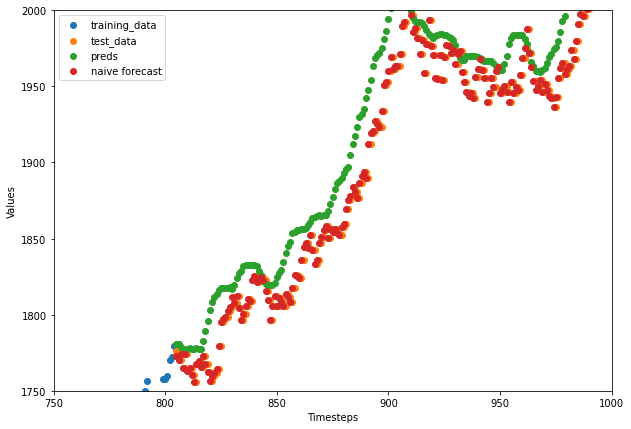

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, label="training_data")
plt.scatter(X_test, y_test, label="test_data")
plt.scatter(X_test[:-window_size], model_2.preds, label="preds")
plt.scatter(X_test[:-1], y_test[1:], label="naive forecast")
plt.xlim(750, 1000)
plt.ylim(1750, 2000)
plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("Values")
plt.show();

In [142]:
# Model 3: LSTM
model_3 = tf.keras.Sequential([
                               layers.LSTM(64, activation="relu", return_sequences=True, input_shape=[None, 1]),
                               layers.LSTM(64, activation="relu"),
                               layers.Dense(1)
                               
])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, None, 64)          16896     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [143]:
model_3.compile(loss="mae",
                optimizer="adam")
model_3.fit(train_dataset,
            epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 13ms/step - loss: 904.9726
Epoch 2/20
25/25 [==============================] - 0s 12ms/step - loss: 178.2302
Epoch 3/20
25/25 [==============================] - 0s 11ms/step - loss: 58.0077
Epoch 4/20
25/25 [==============================] - 0s 13ms/step - loss: 27.3863
Epoch 5/20
25/25 [==============================] - 0s 12ms/step - loss: 13.7201
Epoch 6/20
25/25 [==============================] - 0s 12ms/step - loss: 13.0487
Epoch 7/20
25/25 [==============================] - 0s 12ms/step - loss: 13.0315
Epoch 8/20
25/25 [==============================] - 0s 12ms/step - loss: 14.0474
Epoch 9/20
25/25 [==============================] - 0s 12ms/step - loss: 13.4969
Epoch 10/20
25/25 [==============================] - 0s 12ms/step - loss: 12.9475
Epoch 11/20
25/25 [==============================] - 0s 11ms/step - loss: 12.9070
Epoch 12/20
25/25 [==============================] - 0s 12ms/step - loss: 15.3240
Epoch 13/20
25/25 [====

In [144]:
model_3.preds = tf.squeeze(model_3.predict(test_dataset))

In [160]:
def plot_zoomed_predictions(preds, window_size, X_test=X_test, y_test=y_test, plot_naive=True):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train, y_train, label="training_data")
  plt.scatter(X_test, y_test, label="test_data")
  plt.scatter(X_test[:-window_size], model_3.preds, label="preds")
  if plot_naive:
    plt.scatter(X_test[:-1], y_test[1:], label="naive forecast")
  plt.xlim(750, 1000)
  plt.ylim(1750, 2000)
  plt.legend()
  plt.xlabel("Timesteps")
  plt.ylabel("Values")
  plt.show();

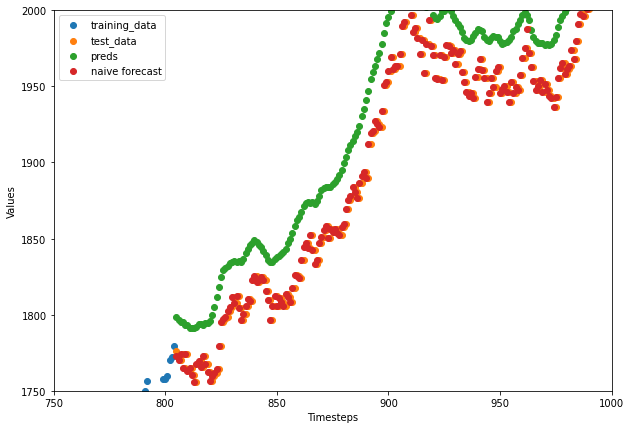

In [161]:
plot_zoomed_predictions(preds=model_3.preds,
                        window_size=window_size)

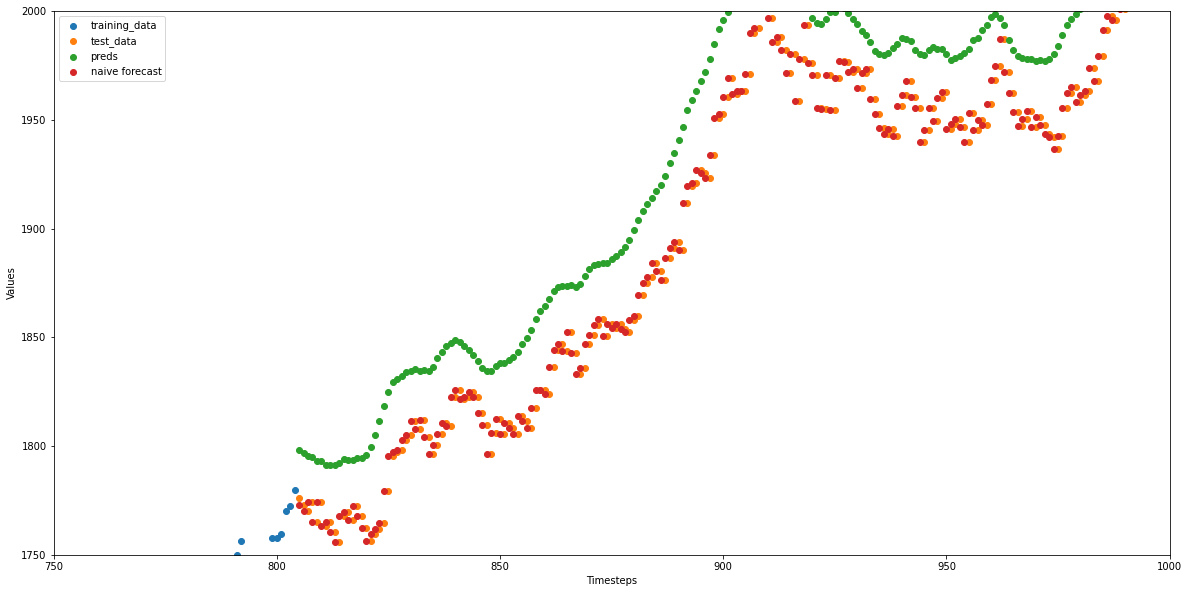

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(X_train, y_train, label="training_data")
plt.scatter(X_test, y_test, label="test_data")
plt.scatter(X_test[:-window_size], model_3.preds, label="preds")
plt.scatter(X_test[:-1], y_test[1:], label="naive forecast")
plt.xlim(750, 1000)
plt.ylim(1750, 2000)
plt.legend()
plt.xlabel("Timesteps")
plt.ylabel("Values")
plt.show();

In [147]:
model_3.evaluate(test_dataset), model_3.evaluate(test_dataset)

6/6 [==============================] - 0s 16ms/step - loss: 22.2476


(22.24764060974121, 22.24764060974121)

In [ ]:
def evaluate_preds(y_true, y_pred, window_size=window_size):
  # account for window size
  y_true
  mae = tf.keras.metrics.mean_absolute_percentage_error(y_true)

In [166]:
# get labels from actual dataset
test_labels = []
for data, label in test_dataset:
  test_labels.append(label)
len(test_labels)

6

In [175]:
for labels in test_labels:
  print(len(labels))

32
32
32
32
32
32


In [178]:
flat_labels = [item for sublist in test_labels for item in test_labels]
flat_labels

[<tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([1767.8, 1769.5, 1765.8, 1772.6, 1767.7, 1762.4, 1756.4, 1759.6,
        1762. , 1764.6, 1779.5, 1795.3, 1797.4, 1798.4, 1802.6, 1805.1,
        1811.5, 1807.7, 1812.1, 1804.4, 1796.5, 1800.5, 1805.5, 1810.5,
        1809.3, 1822.8, 1825.6, 1821.7, 1822.5, 1824.9, 1822.6, 1815.4],
       dtype=float32)>, <tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([1809.5, 1796.3, 1805.9, 1812.4, 1805.6, 1810.7, 1808.4, 1805.6,
        1813.9, 1811.7, 1808.3, 1817.3, 1825.9, 1825.6, 1823.8, 1836.2,
        1844.2, 1847. , 1843.5, 1852.3, 1842.8, 1833.3, 1836. , 1847. ,
        1851.3, 1855.6, 1858.5, 1850.5, 1856.3, 1854.4, 1856. , 1853.7],
       dtype=float32)>, <tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([1852.3, 1857.8, 1859.7, 1869.7, 1875.2, 1877.9, 1884. , 1880.5,
        1876.6, 1886.7, 1891.1, 1893.8, 1890.1, 1912. , 1919.7, 1920.9,
        1927.1, 1925.5, 1923.2, 1933.8, 1950.7, 1952.7, 1960.4, 1969.1,
        1961.7, 

In [170]:
test_labels

[<tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([1767.8, 1769.5, 1765.8, 1772.6, 1767.7, 1762.4, 1756.4, 1759.6,
        1762. , 1764.6, 1779.5, 1795.3, 1797.4, 1798.4, 1802.6, 1805.1,
        1811.5, 1807.7, 1812.1, 1804.4, 1796.5, 1800.5, 1805.5, 1810.5,
        1809.3, 1822.8, 1825.6, 1821.7, 1822.5, 1824.9, 1822.6, 1815.4],
       dtype=float32)>, <tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([1809.5, 1796.3, 1805.9, 1812.4, 1805.6, 1810.7, 1808.4, 1805.6,
        1813.9, 1811.7, 1808.3, 1817.3, 1825.9, 1825.6, 1823.8, 1836.2,
        1844.2, 1847. , 1843.5, 1852.3, 1842.8, 1833.3, 1836. , 1847. ,
        1851.3, 1855.6, 1858.5, 1850.5, 1856.3, 1854.4, 1856. , 1853.7],
       dtype=float32)>, <tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([1852.3, 1857.8, 1859.7, 1869.7, 1875.2, 1877.9, 1884. , 1880.5,
        1876.6, 1886.7, 1891.1, 1893.8, 1890.1, 1912. , 1919.7, 1920.9,
        1927.1, 1925.5, 1923.2, 1933.8, 1950.7, 1952.7, 1960.4, 1969.1,
        1961.7, 

In [169]:
tf.squeeze(test_labels[0]).numpy()

array([1767.8, 1769.5, 1765.8, 1772.6, 1767.7, 1762.4, 1756.4, 1759.6,
       1762. , 1764.6, 1779.5, 1795.3, 1797.4, 1798.4, 1802.6, 1805.1,
       1811.5, 1807.7, 1812.1, 1804.4, 1796.5, 1800.5, 1805.5, 1810.5,
       1809.3, 1822.8, 1825.6, 1821.7, 1822.5, 1824.9, 1822.6, 1815.4],
      dtype=float32)

In [93]:
for in range(100):
  model.predict(X)
  layers.Dropout(0.5, training=True)

SyntaxError: ignored